In [65]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('boat_data.csv')
df.dropna()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58
5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland,132
10,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland,239
...,...,...,...,...,...,...,...,...,...,...
9880,CHF 4980,Sport Boat,Linder power boats,new boat from stock,0,4.01,1.64,Aluminium,Switzerland,247
9881,CHF 4950,Sport Boat,Marine power boats,new boat from stock,0,3.99,1.52,Aluminium,Switzerland,150
9882,CHF 4950,Fishing Boat,Staempfli power boats,"Used boat,Unleaded",1984,6.00,1.62,Plastic,Switzerland,288
9885,EUR 4499,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany,354


In [66]:
# Price conversion --> to EUR
# 1 CHF (Schweize Franken) = 1,02 EUR
# 1 Â£ = 1.15 EUR
# 1 DKK (Dänische Krone)= 0.13 EUR
# df.corr()

# Split Currency and Amount from each other
df['Currency']=df['Price'].str[:3]
df['Amount']=df['Price'].str[4:10].str.strip().astype(int)
# Convert to EUR
cur_dict={
    'CHF':1.02,'Â£ ':1.15, 'DKK':0.13,'EUR':1
}
df.replace({'Currency':cur_dict},inplace=True)
df['Price_EUR']=df['Currency']*df['Amount']
df.sample(20)


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Amount,Price_EUR
3458,EUR 2000000,Flybridge,Baikal power boats,"new boat on order,Diesel",2020,23.20,6.40,Steel,Russian,227,1.00,200000,200000.0
5123,EUR 219900,Motor Yacht,Sunseeker power boats,"Used boat,Diesel",2004,14.76,4.20,GRP,Spain,177,1.00,219900,219900.0
8483,EUR 38000,Pontoon Boat,Cranchi power boats,"Used boat,Unleaded",2006,8.30,2.80,GRP,Italy,152,1.00,38000,38000.0
5682,EUR 155000,Flybridge,Raffaelli power boats,"Used boat,Diesel",1998,16.00,4.35,NaN,Italy,78,1.00,155000,155000.0
3990,EUR 570000,Motor Yacht,NaN,"Used boat,Diesel",1998,18.50,4.88,GRP,Spain,78,1.00,570000,570000.0
3379,EUR 4250000,Mega Yacht,Johnson power boats,"Used boat,Diesel",2013,32.92,7.20,GRP,Taiwan,118,1.00,425000,425000.0
2057,EUR 142576,Sport Boat,Cranchi power boats,Used boat,2019,7.85,2.49,PVC,France,40,1.00,142576,142576.0
9362,EUR 18500,Cabin Boat,NaN,Used boat,1983,8.10,2.95,GRP,Netherlands,127,1.00,18500,18500.0
6929,EUR 79000,Deck Boat,NaN,"Used boat,Unleaded",2012,10.70,3.05,GRP,Italy,87,1.00,79000,79000.0
4055,EUR 525000,Motor Yacht,Monachus power boats,"Used boat,Diesel",2020,13.85,4.20,GRP,Croatia,180,1.00,525000,525000.0


In [67]:
# Categorize Prices
df['Price_EUR'].describe()
# 25th percentile 40,000 EUR
# 50th percentile 87,720 EUR --> median
# 75th percentile 199,937 EUR
# max= 1,144,250
# Categories= Under 45K (0-45K) / Cheap (45K-160K) / Average (160K-220K)/ Expensive(220K-500K)/ Very Expensive  (500K and above)
price_category=pd.cut(df['Price_EUR'],bins=[0,45001,160001,220001,500001,1144250],labels=
['Under 45K','Cheap','Average','Expensive','Very Expensive']) 
df.insert(1,'EUR Price Group',price_category)


In [68]:
# Split Boat types
df[['Boat Type-Main','Boat Type 2','Boat Type 3']]=df['Boat Type'].str.split(',',expand=True)
# Split Type (Condition/Fuel Type)
df[['Condition','Fuel Type']]=df['Type'].str.split(',',expand=True)
# Boat age
df['Age'] = 2022 - df['Year Built']
df['Age'] = df['Age'].replace(2022, 0) # Replace 2022 with 0
# df['Age'].describe()
# Categorizing Age (0-5) / (5-16) / (16-26) / (26-51) / (51-100) / (137+)
age_category=pd.cut(df.Age,bins=[0,5,16,26,51,101,137],
labels=['0-4 years','5-15 years','16-25 years','26-50 years','51-100 years','101+ years'])
df.insert(19,'Age Group',age_category)

In [69]:
# Categorizing Views
# df['Number of views last 7 days'].describe()
views_category=pd.cut(df['Number of views last 7 days'],bins=[0,71,111,176,1301,3263],
labels=['Low','Medium','Above average','Good','Best'])
df.insert(21,'View_group',views_category)


In [70]:
# Location
df['Location']=df['Location'].str.replace('\d+','') # remove digits
# df['Location']=df['Location'].str.replace('Ã','')  # remove Ã / Â
# df['Location'].str.contains('Ã').sum()
df=df.replace('Ã',np.nan,regex=True)
df=df.replace('Â',np.nan,regex=True)
# Remove 'Ã' from Manufacturer
# df['Manufacturer']=df['Manufacturer'].str.replace('Ã','') # remove Ã


C:\Users\Estorko\AppData\Local\Temp\ipykernel_22500\3016067260.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Location']=df['Location'].str.replace('\d+','') # remove digits


In [71]:
df['Manufacturer'].str.contains('Ã').sum()
df['Location'].str.contains('Ã').sum()
df.head()


,Price,EUR Price Group,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,...,Amount,Price_EUR,Boat Type-Main,Boat Type 2,Boat Type 3,Condition,Fuel Type,Age Group,Age,View_group
0,CHF 3337,Under 45K,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,...,3337,3403.74,Motor Yacht,None,None,new boat from stock,None,0-4 years,5,Good
1,EUR 3490,Under 45K,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,...,3490,3490.00,Center console boat,None,None,new boat from stock,None,0-4 years,2,Medium
2,CHF 3770,Under 45K,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,...,3770,3845.40,Sport Boat,None,None,new boat from stock,None,NaN,0,Above average
3,DKK 25900,Under 45K,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,...,25900,3367.00,Sport Boat,None,None,new boat from stock,None,0-4 years,2,Low
4,EUR 3399,Under 45K,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,...,3399,3399.00,Fishing Boat,None,None,new boat from stock,None,0-4 years,3,Low


# Analyzing the Market / Data

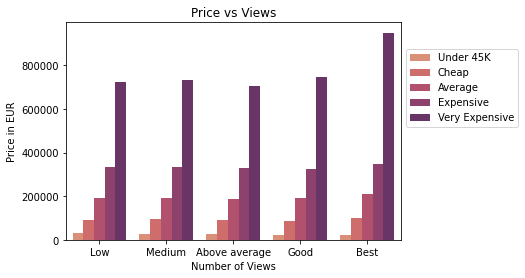

In [72]:
# Fig 1
# 1.) Price vs Number of Views
fig=sns.barplot(x='View_group',y='Price_EUR',data=df,ci=False,palette='flare',hue='EUR Price Group')
fig.set(xlabel='Number of Views',ylabel='Price in EUR',title='Price vs Views')
fig.legend(loc='center left',bbox_to_anchor=(1, 0.7))

The most expensive boats are the most viewed boats. in each view category the highest viewed boats are the most expensive one

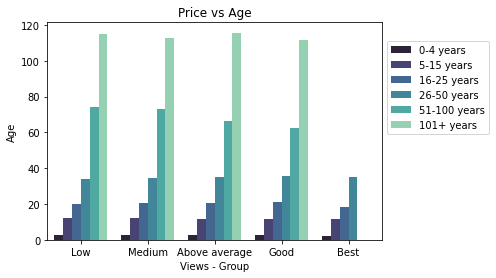

In [73]:
# Fig 2
# 2.) Years vs Views
fig=sns.barplot(x='View_group',y='Age',data=df,ci=False,palette='mako',hue='Age Group')
fig.set(xlabel='Views - Group',ylabel='Age',title='Price vs Age')
fig.legend(loc='center left',bbox_to_anchor=(1, 0.7))

The most viewed boats are the oldest boats on average. in all view groups the most viewed boats are the 101+ year old boats. The best viewed boats however are the 26-50 year old boats

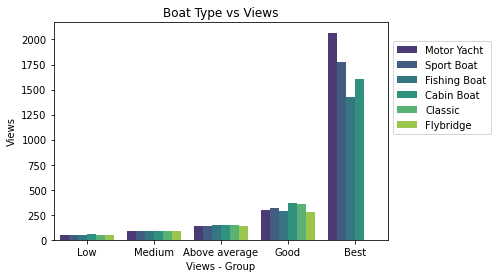

In [105]:
# Fig 3
# 3.) Boat Type vs Views
fig=sns.barplot(x='View_group',y='Number of views last 7 days',data=df,palette='viridis',hue='Boat Type-Main',hue_order=['Motor Yacht',
'Sport Boat','Fishing Boat','Cabin Boat','Classic','Flybridge'],ci=False)
fig.set(xlabel='Views - Group',ylabel='Views',title='Boat Type vs Views')
fig.legend(loc='center left',bbox_to_anchor=(1, 0.7))


Consumers are mainly looking for Motor yachts and sport boats. Motor yacht is mainly for families while the sport boat is for young people who like water sports.

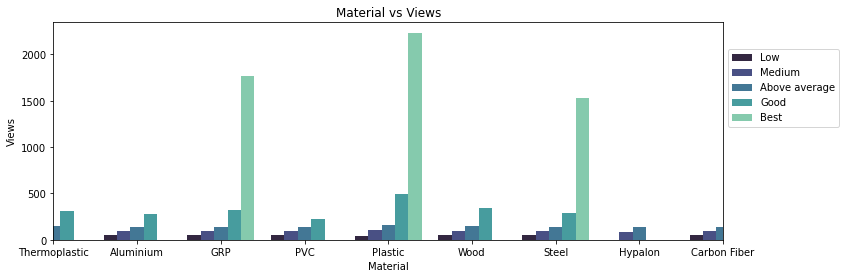

In [81]:
# Fig 4
# 4.) Material vs Views
fig,ax=plt.subplots(figsize=(12,4))
fig=sns.barplot(x='Material',y='Number of views last 7 days',data=df,palette='mako',hue='View_group',ci=False)
fig.set(xlabel='Material',ylabel='Views',title='Material vs Views',xlim=(0,8))
fig.legend(loc='center left',bbox_to_anchor=(1, 0.7))

Boats made by Plastic and GRP material are more viewed than other materials. Boats made by plastic material are the most viewed boats, because they are the cheapest option >> next graph

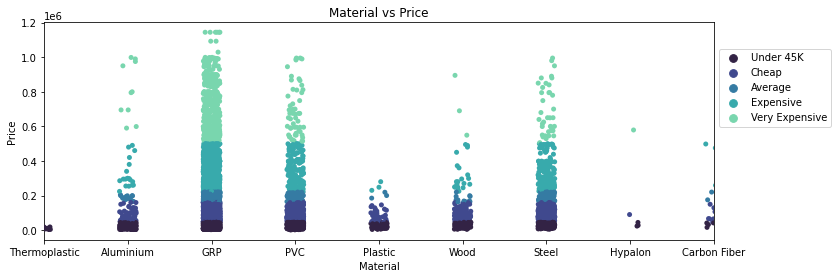

In [100]:
# Fig 5
# 5.) Material vs Price
fig,ax=plt.subplots(figsize=(12,4))
# fig=sns.barplot(x='Material',y='Price_EUR',data=df,palette='mako',hue='EUR Price Group',ci=False)
fig=sns.stripplot(x='Material',y='Price_EUR',data=df,palette='mako',hue='EUR Price Group')
fig.set(xlabel='Material',ylabel='Price',title='Material vs Price',xlim=(0,8))
fig.legend(loc='center left',bbox_to_anchor=(1, 0.7))

AS we can see boats made by Plastic material are cheaper than boats made with GRP or Steel, which explains why they get the most views.

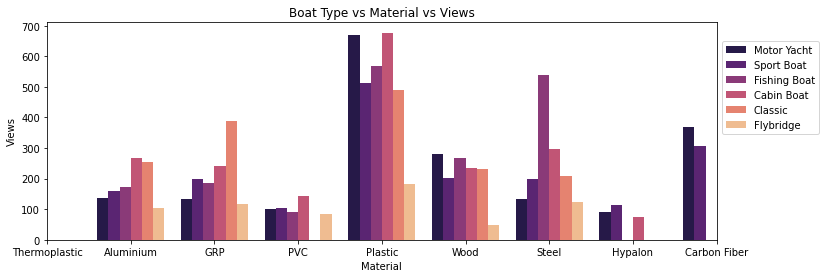

In [116]:
# Fig 6
# 6.) Boat Type vs Material vs Views
fig,ax=plt.subplots(figsize=(12,4))
fig=sns.barplot(x='Material',y='Number of views last 7 days',data=df,palette='magma',hue='Boat Type-Main',ci=False,hue_order=['Motor Yacht',
'Sport Boat','Fishing Boat','Cabin Boat','Classic','Flybridge'])
fig.set(xlabel='Material',ylabel='Views',title='Boat Type vs Material vs Views',xlim=(0,8))
fig.legend(loc='center left',bbox_to_anchor=(1, 0.7))

As we can see that accross multiple Boat types, the common feature is that they are made by plastic material. The highest viewed boats who are made by platic material are Motor Yachts and Cabin Boats.

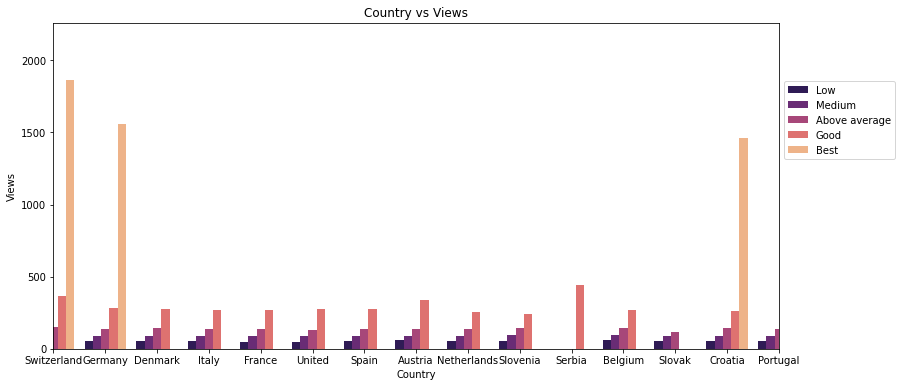

In [202]:
# Fig 7
# 7.) Country vs Views
fig,ax=plt.subplots(figsize=(13,6))
fig=sns.barplot(x='Location',y='Number of views last 7 days',data=df,palette='magma',hue='View_group',ci=False)
fig.set(xlabel='Country',ylabel='Views',title='Country vs Views',xlim=(0,14))
fig.legend(loc='center left',bbox_to_anchor=(1, 0.7))


The top locations are Switzerland, Germany and Croatia

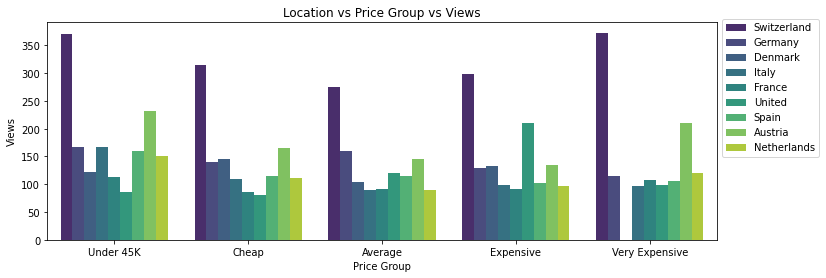

In [217]:
# Fig 8
# 8.) Location vs Price Group vs Views
fig,ax=plt.subplots(figsize=(12,4))
fig=sns.barplot(x='EUR Price Group',y='Number of views last 7 days',data=df,palette='viridis',hue='Location',ci=False,hue_order=
['Switzerland','Germany','Denmark','Italy','France','United','Spain','Austria','Netherlands'])
fig.set(xlabel='Price Group',ylabel='Views',title='Location vs Price Group vs Views')
fig.legend(loc='center left',bbox_to_anchor=(1, 0.7))

Swiss people are affordable for any kind of boat. Gerans prefer Average boats (160K-220K)

Findings

- The most expensive boats get the most views (Fig 1)
- The most viewed boats are the oldest boats on (Fig 2) average. in all view groups the most viewed boats are the 101+ year old boats. The best/highest viewed boats however are the 26-50 year old boats
- Consumers are mainly looking for Motor yachts and sport boats. Motor yacht is mainly for families while the sport boat is for young people who like water sports. (Fig 3)
- Boats made by Plastic and GRP material are more viewed than other materials. Boats made by plastic material are the most viewed boats, because they are the cheapest option >> next graph (Fig 4)
- AS we can see boats made by Plastic material are cheaper than boats made with GRP or Steel, which explains why they get the most views. (Fig 5)
- As we can see that accross multiple Boat types, the common feature is that they are made by plastic material. The highest viewed boats who are made by platic material are Motor Yachts and Cabin Boats.(Fig 6)
- The top countries are Switzerland, Germany and Croatia (Fig 7)
- Swiss people are affordable for any kind of boat. Gerans prefer Average boats (160K-220K) (Fig 8)

Conclusion:

Recommend that the marketing team focus on the top countries like Switzerland, Germany and Italy and design special custom newsletters while providing standard versions to the rest.
The weekly newsletter should include key boat features, giving insightful information to boat owners, so that they would know how to boost their boat sales
Key Features:
- Motor Yacht, Sport Boat, and Flybridge boat types
- made with plastic material
- 

Once the listing matches the features, its page view will increase and might lead to more revenue to sellers!

